# __ANN Regression__

In [1]:
import pandas as pd
import numpy as np

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import R2Score


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# __1. Data Gathering__

In [2]:
df = pd.read_csv('../../data/boston_data.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# __2. EDA__

In [3]:
x = df.drop('PRICE', axis=1)
y = df['PRICE']

# __3. Scaling__

In [4]:
std_scalar = StandardScaler()
x_scaled = pd.DataFrame(std_scalar.fit_transform(x), columns=x.columns)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size=0.8, random_state=45)

# __4. Model Training__

In [6]:
dl_model = Sequential()
dl_model.add(Dense(units=4, activation="relu", input_dim=13))

In [7]:
dl_model.add(Dense(units=4, activation="relu"))
dl_model.add(Dense(units=1, activation="linear"))       # OUTPUT 
dl_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 56        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
dl_model.compile(loss='mean_squared_error', optimizer='adam', metrics=R2Score())
# history = dl_model.fit(x_train, y_train, epochs=500, batch_size=15, verbose=1, validation_split=0.2)

In [9]:
history.history.keys()

dict_keys(['loss', 'r2_score', 'val_loss', 'val_r2_score'])

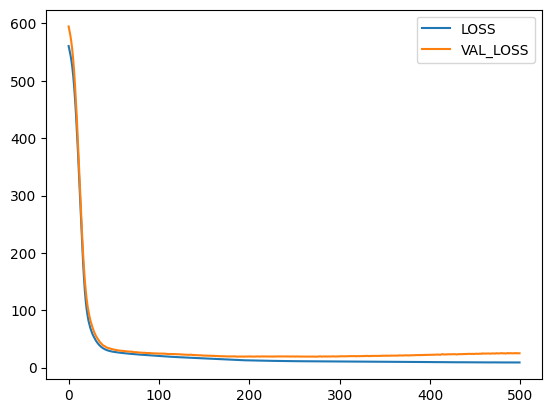

In [10]:
plt.plot(history.history['loss'], label="LOSS")
plt.plot(history.history['val_loss'], label="VAL_LOSS")
plt.legend()

In [11]:
history.history.keys()

dict_keys(['loss', 'r2_score', 'val_loss', 'val_r2_score'])

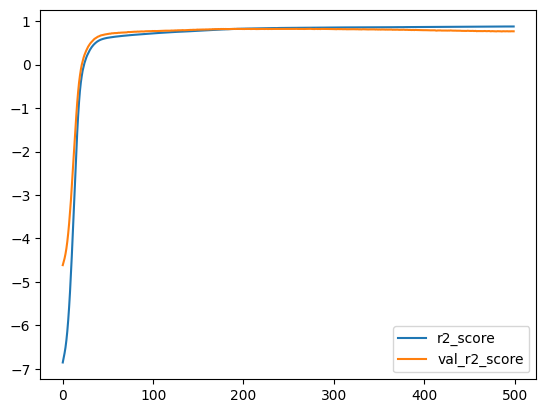

In [12]:
plt.plot(history.history['r2_score'], label="r2_score")
plt.plot(history.history['val_r2_score'], label="val_r2_score")
plt.legend()